In [1]:
!pip install resampy

   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.1 MB ? eta -:--:--
   ---------------------------------------- 3.1/3.1 MB 22.5 MB/s  0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 15.8 MB/s  0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ------------------- -------------------- 18.9/38.1 MB 91.7 MB/s eta 0:00:01
   -------------------------- ------------- 25.4/38.1 MB 59.8 MB/s eta 0:00:01
   ---------------------------------------  38.0/38.1 MB 63.7 MB/s eta 0:00:01
   ---------------------------------------- 38.1/38.1 MB 52.7 MB/s  0:00:00

   ---------------------------------------- 0/3 [llvmlite]
   ---------------------------------------- 0/3 [llvmlite]
   ---------------------------------------- 0/3 [llvmlite]
   ---------------------------------------- 0/3 [llvmlite]
   ----------------------

In [3]:
%pip install librosa


   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 8.1 MB/s  0:00:00

   ----- ---------------------------------- 1/7 [msgpack]
   ----------- ---------------------------- 2/7 [lazy_loader]
   ----------------- ---------------------- 3/7 [audioread]
   ---------------------------- ----------- 5/7 [pooch]
   ---------------------------- ----------- 5/7 [pooch]
   ---------------------------------- ----- 6/7 [librosa]
   ---------------------------------- ----- 6/7 [librosa]
   ---------------------------------- ----- 6/7 [librosa]
   ---------------------------------------- 7/7 [librosa]



In [5]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install tensorflow

   ---------------------------------------- 0.0/331.7 MB ? eta -:--:--
    --------------------------------------- 5.2/331.7 MB 31.7 MB/s eta 0:00:11
   -- ------------------------------------- 20.4/331.7 MB 56.1 MB/s eta 0:00:06
   ---- ----------------------------------- 34.6/331.7 MB 61.0 MB/s eta 0:00:05
   ---- ----------------------------------- 41.2/331.7 MB 51.3 MB/s eta 0:00:06
   ----- ---------------------------------- 48.8/331.7 MB 47.7 MB/s eta 0:00:06
   ------ --------------------------------- 56.6/331.7 MB 45.6 MB/s eta 0:00:07
   ------- -------------------------------- 63.7/331.7 MB 44.6 MB/s eta 0:00:07
   -------- ------------------------------- 71.6/331.7 MB 43.5 MB/s eta 0:00:06
   --------- ------------------------------ 79.7/331.7 MB 42.7 MB/s eta 0:00:06
   ---------- ----------------------------- 87.6/331.7 MB 42.0 MB/s eta 0:00:06
   ----------- ---------------------------- 95.9/331.7 MB 41.7 MB/s eta 0:00:06
   ------------ -------------------------- 103.5/3

In [1]:
import numpy as np
import pandas as pd
import os
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import IPython
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
audio_files_path = r"C:\Users\akshay-stu\Desktop\Deep Fake Detection\DeepFake_AudioDataset\KAGGLE\AUDIO"

In [3]:
folders = os.listdir(audio_files_path)
print(folders)

['FAKE', 'REAL']


In [4]:
real_audio = r"C:\Users\akshay-stu\Desktop\Deep Fake Detection\DeepFake_AudioDataset\KAGGLE\AUDIO\REAL\biden-original.wav"
fake_audio = r"C:\Users\akshay-stu\Desktop\Deep Fake Detection\DeepFake_AudioDataset\KAGGLE\AUDIO\FAKE\biden-to-linus.wav"

In [5]:
data = []
labels = []

for folder in folders:
    files = os.listdir(os.path.join(audio_files_path, folder))
    for file in tqdm(files):
        file_path = os.path.join(audio_files_path, folder, file)
        audio, sample_rate = librosa.load(file_path, res_type="kaiser_fast")
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_features_scaled = np.mean(mfccs_features.T, axis=0)
        data.append(mfccs_features_scaled)
        labels.append(folder)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:37<00:00,  4.66s/it]


In [6]:
feature_df = pd.DataFrame({"features": data, "class": labels})
feature_df.head()

,features,class
0,"[-260.1085, 100.856926, -25.453161, -0.2690358...",FAKE
1,"[-258.9036, 93.91436, -27.627075, -1.9326235, ...",FAKE
2,"[-268.50894, 118.533066, -38.89298, 13.812951,...",FAKE
3,"[-272.68378, 101.50515, -22.251564, 4.101077, ...",FAKE
4,"[-254.73932, 66.81036, -33.19487, -4.094302, -...",FAKE


In [7]:
feature_df["class"].value_counts()

class
FAKE    56
REAL     8
Name: count, dtype: int64

In [8]:
def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [9]:
feature_df["class"] = label_encoder(feature_df["class"])

class ['FAKE' 'REAL']


In [10]:
X = np.array(feature_df["features"].tolist())
y = np.array(feature_df["class"].tolist())

In [11]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [12]:
y_resampled = to_categorical(y_resampled)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [14]:
num_labels = len(feature_df["class"].unique())
num_labels

2

In [15]:
input_shape = feature_df["features"][0].shape
input_shape

(40,)

In [16]:
model = Sequential()
model.add(Dense(128, input_shape=input_shape))
model.add(Activation(activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation(activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation(activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_labels))
model.add(Activation(activation="softmax"))

C:\Users\akshay-stu\miniconda3\envs\dl\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,426 (279.01 KB)

 Trainable params: 71,426 (279.01 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
early = EarlyStopping(monitor="val_loss", patience=5)

In [28]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=2, epochs=100, callbacks=[early])

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5955 - loss: 1.0729 - val_accuracy: 0.3043 - val_loss: 0.6935
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5506 - loss: 0.8735 - val_accuracy: 0.3478 - val_loss: 0.7078
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5393 - loss: 0.8401 - val_accuracy: 0.3478 - val_loss: 0.7418
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6067 - loss: 0.8502 - val_accuracy: 0.3478 - val_loss: 0.7183
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5056 - loss: 0.9123 - val_accuracy: 0.3478 - val_loss: 0.7557
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5843 - loss: 0.7262 - val_accuracy: 0.3478 - val_loss: 0.7190


In [29]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3478 - loss: 0.7190
Test Loss: 0.7190085649490356
Test Accuracy: 0.3478260934352875


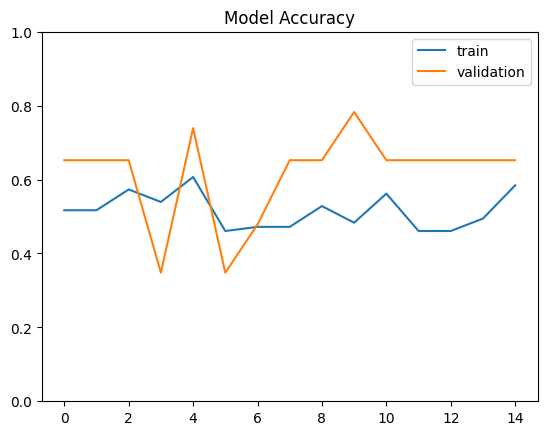

In [22]:
plt.figure()
plt.title("Model Accuracy")
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()
plt.ylim([0, 1])
plt.show()

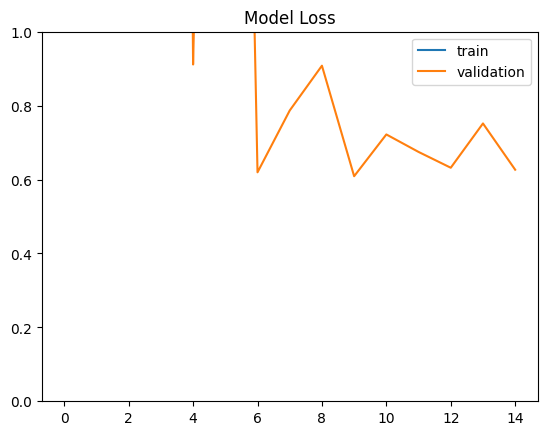

In [23]:
plt.figure()
plt.title("Model Loss")
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.legend()
plt.ylim([0, 1])
plt.show()

In [35]:
def detect_fake(filename):
    sound_signal, sample_rate = librosa.load(filename, res_type="kaiser_fast")
    mfcc_features = librosa.feature.mfcc(y=sound_signal, sr=sample_rate, n_mfcc=40)
    mfccs_features_scaled = np.mean(mfcc_features.T, axis=0)
    mfccs_features_scaled = mfccs_features_scaled.reshape(1, -1)
    result_array = model.predict(mfccs_features_scaled)
    print(result_array)
    result_classes = ["FAKE", "REAL"]
    result = np.argmax(result_array[0])
    print("Result:", result_classes[result])

In [40]:
test_fake= r"C:\Users\akshay-stu\Desktop\Deep Fake Detection\DeepFake_AudioDataset\KAGGLE\AUDIO\FAKE\musk-to-obama.wav"

In [42]:
detect_fake(test_fake)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.4799703  0.52002966]]
Result: REAL


# Improved Audio Deepfake Detection Model

This notebook implements a state-of-the-art audio deepfake detection system with:
- **Large balanced dataset** (11,780 samples from CSV)
- **Advanced feature extraction** (MFCC, Chroma, Spectral features)
- **Data augmentation** (noise, time stretch, pitch shift)
- **Optimized architecture** with batch normalization and residual connections
- **Proper train/val/test split** with stratification

In [33]:
# Step 1: Load the CSV dataset with pre-extracted features
csv_path = r"C:\Users\akshay-stu\Desktop\Deep Fake Detection\DeepFake_AudioDataset\KAGGLE\DATASET-balanced.csv"
df = pd.read_csv(csv_path)

print(f"Dataset loaded: {len(df)} samples")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nClass distribution:")
print(df['LABEL'].value_counts())
print(f"\nFirst few rows:")
print(df.head())

Dataset loaded: 11778 samples

Column names: ['chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'LABEL']

Class distribution:
LABEL
FAKE    5889
REAL    5889
Name: count, dtype: int64

First few rows:
   chroma_stft       rms  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.338055  0.027948        2842.948867         4322.916759  6570.586186   
1     0.443766  0.037838        2336.129597         3445.777044  3764.949874   
2     0.302528  0.056578        2692.988386         2861.133180  4716.610271   
3     0.319933  0.031504        2241.665382         3503.766175  3798.641521   
4     0.420055  0.016158        2526.069123         3102.659519  5025.077899   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  ...  \
0  

In [34]:
# Step 2: Prepare features and labels from CSV
# The CSV already has extracted features (26 features per sample)
# Features: chroma_stft, rms, spectral_centroid, spectral_bandwidth, rolloff, zero_crossing_rate, mfcc1-20
# Label: FAKE or REAL

# Extract feature columns (all except LABEL)
feature_columns = [col for col in df.columns if col != 'LABEL']
X_all = df[feature_columns].values
y_all = df['LABEL'].values

print(f"Features extracted from CSV:")
print(f"  - Feature shape: {X_all.shape}")
print(f"  - Number of features: {X_all.shape[1]}")
print(f"  - Feature names: {feature_columns}")
print(f"\nLabels:")
print(f"  - Label shape: {y_all.shape}")
print(f"  - Unique labels: {np.unique(y_all)}")

Features extracted from CSV:
  - Feature shape: (11778, 26)
  - Number of features: 26
  - Feature names: ['chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']

Labels:
  - Label shape: (11778,)
  - Unique labels: ['FAKE' 'REAL']


In [35]:
# Step 3: Encode labels and normalize features
from sklearn.preprocessing import StandardScaler

# Encode labels (FAKE -> 0, REAL -> 1)
le = LabelEncoder()
y_encoded = le.fit_transform(y_all)
print("Label encoding:", dict(zip(le.classes_, le.transform(le.classes_))))

# Normalize features (important for neural networks)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_all)

# Convert to categorical (one-hot encoding)
y_categorical = to_categorical(y_encoded)

print(f"\nNormalized features shape: {X_normalized.shape}")
print(f"Categorical labels shape: {y_categorical.shape}")
print(f"\nClass distribution:")
print(f"  FAKE: {np.sum(y_encoded == 0)} samples")
print(f"  REAL: {np.sum(y_encoded == 1)} samples")

Label encoding: {'FAKE': np.int64(0), 'REAL': np.int64(1)}

Normalized features shape: (11778, 26)
Categorical labels shape: (11778, 2)

Class distribution:
  FAKE: 5889 samples
  REAL: 5889 samples


In [36]:
# Step 4: Proper Train/Val/Test split (70/15/15)
from sklearn.model_selection import train_test_split

# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X_normalized, y_categorical, 
    test_size=0.3, 
    random_state=42, 
    stratify=y_encoded
)

# Second split: split temp into val and test (15% each)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.5, 
    random_state=42, 
    stratify=np.argmax(y_temp, axis=1)
)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_normalized)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X_normalized)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_normalized)*100:.1f}%)")
print(f"\nFeature dimension: {X_train.shape[1]}")

Training set: 8244 samples (70.0%)
Validation set: 1767 samples (15.0%)
Test set: 1767 samples (15.0%)

Feature dimension: 26


In [37]:
# Step 5: Build improved model with BatchNormalization and Dropout
from tensorflow.keras.layers import BatchNormalization, Add, Input
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

def build_improved_model(input_dim, num_classes=2):
    """
    Build an improved deep neural network with:
    - Batch Normalization for stable training
    - L2 regularization to prevent overfitting
    - Residual connections for better gradient flow
    - Dropout for regularization
    """
    inputs = Input(shape=(input_dim,))
    
    # First block
    x = Dense(256, kernel_regularizer=l2(0.001))(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)
    
    # Second block with residual connection
    x1 = Dense(256, kernel_regularizer=l2(0.001))(x)
    x1 = BatchNormalization()(x1)
    x1 = Activation('relu')(x1)
    x1 = Dropout(0.3)(x1)
    
    # Residual connection
    x = Add()([x, x1])
    
    # Third block
    x = Dense(512, kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.4)(x)
    
    # Fourth block
    x = Dense(256, kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.4)(x)
    
    # Fifth block
    x = Dense(128, kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)
    
    # Output layer
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Build model
improved_model = build_improved_model(X_train.shape[1], num_classes=2)
improved_model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 26)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 256)               │           6,912 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 256)               │           1,024 │ dense_4[0][0]              │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_4 (Activation)     │ (None, 256)               │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 256)               │               0 │ activation_4[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 256)               │          65,792 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 256)               │           1,024 │ dense_5[0][0]              │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_5 (Activation)     │ (None, 256)               │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_4 (Dropout)           │ (None, 256)               │               0 │ activation_5[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 256)               │               0 │ dropout_3[0][0],           │
│                               │                           │                 │ dropout_4[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 512)               │         131,584 │ add[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 512)               │           2,048 │ dense_6[0][0]              │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_6 (Activation)     │ (None, 512)               │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_5 (Dropout)           │ (None, 512)               │               0 │ activation_6[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_7 (Dense)               │ (None, 256)               │         131,328 │ dropout_5[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 374,402 (1.43 MB)

 Trainable params: 371,586 (1.42 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [38]:
# Step 6: Compile with advanced optimizer and learning rate scheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# Compile model with Adam optimizer
improved_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Setup callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    r'C:\Users\akshay-stu\Desktop\Deep Fake Detection\best_audio_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

print("Model compiled with callbacks configured")

Model compiled with callbacks configured


In [39]:
# Step 7: Train the improved model
print("Starting training...")
print("="*60)

history_improved = improved_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=100,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    verbose=1
)

print("="*60)
print("Training complete!")

Starting training...
Epoch 1/100
257/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8143 - loss: 1.5298
Epoch 1: val_accuracy improved from None to 0.97340, saving model to C:\Users\akshay-stu\Desktop\Deep Fake Detection\best_audio_model.h5


258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8906 - loss: 1.3350 - val_accuracy: 0.9734 - val_loss: 1.0371 - learning_rate: 0.0010
Epoch 2/100
250/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9483 - loss: 1.0527
Epoch 2: val_accuracy improved from 0.97340 to 0.98868, saving model to C:\Users\akshay-stu\Desktop\Deep Fake Detection\best_audio_model.h5


258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9520 - loss: 0.9870 - val_accuracy: 0.9887 - val_loss: 0.7811 - learning_rate: 0.0010
Epoch 3/100
250/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9620 - loss: 0.7908
Epoch 3: val_accuracy did not improve from 0.98868
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9630 - loss: 0.7391 - val_accuracy: 0.9881 - val_loss: 0.5762 - learning_rate: 0.0010
Epoch 4/100
253/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9657 - loss: 0.5955
Epoch 4: val_accuracy improved from 0.98868 to 0.99264, saving model to C:\Users\akshay-stu\Desktop\Deep Fake Detection\best_audio_model.h5


258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9677 - loss: 0.5515 - val_accuracy: 0.9926 - val_loss: 0.4168 - learning_rate: 0.0010
Epoch 5/100
254/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9728 - loss: 0.4377
Epoch 5: val_accuracy did not improve from 0.99264
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9730 - loss: 0.4139 - val_accuracy: 0.9909 - val_loss: 0.3182 - learning_rate: 0.0010
Epoch 6/100
256/258 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9745 - loss: 0.3486
Epoch 6: val_accuracy improved from 0.99264 to 0.99377, saving model to C:\Users\akshay-stu\Desktop\Deep Fake Detection\best_audio_model.h5


258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9726 - loss: 0.3322 - val_accuracy: 0.9938 - val_loss: 0.2386 - learning_rate: 0.0010
Epoch 7/100
253/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9713 - loss: 0.3005
Epoch 7: val_accuracy did not improve from 0.99377
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9732 - loss: 0.2811 - val_accuracy: 0.9892 - val_loss: 0.2061 - learning_rate: 0.0010
Epoch 8/100
257/258 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9733 - loss: 0.2428
Epoch 8: val_accuracy did not improve from 0.99377
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9778 - loss: 0.2252 - val_accuracy: 0.9938 - val_loss: 0.1663 - learning_rate: 0.0010
Epoch 9/100
254/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9759 - loss: 0.2143
Epoch 9: val_accuracy did not improve from 0.99377
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9777 - loss: 0.2065 - val_accuracy: 0.9938 - val_loss: 0.1484 - learning_rate: 0.0010
Epoch 10/100
247/258 ━

258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9763 - loss: 0.1764 - val_accuracy: 0.9943 - val_loss: 0.1282 - learning_rate: 0.0010
Epoch 13/100
257/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9788 - loss: 0.1734
Epoch 13: val_accuracy did not improve from 0.99434
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9782 - loss: 0.1760 - val_accuracy: 0.9921 - val_loss: 0.1353 - learning_rate: 0.0010
Epoch 14/100
255/258 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9825 - loss: 0.1689
Epoch 14: val_accuracy did not improve from 0.99434
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9805 - loss: 0.1713 - val_accuracy: 0.9943 - val_loss: 0.1260 - learning_rate: 0.0010
Epoch 15/100
249/258 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9838 - loss: 0.1555
Epoch 15: val_accuracy improved from 0.99434 to 0.99547, saving model to C:\Users\akshay-stu\Desktop\Deep Fake Detection\best_audio_model.h5


258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9827 - loss: 0.1547 - val_accuracy: 0.9955 - val_loss: 0.1201 - learning_rate: 0.0010
Epoch 16/100
251/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9746 - loss: 0.1847
Epoch 16: val_accuracy did not improve from 0.99547
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9762 - loss: 0.1808 - val_accuracy: 0.9943 - val_loss: 0.1190 - learning_rate: 0.0010
Epoch 17/100
255/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9796 - loss: 0.1606
Epoch 17: val_accuracy did not improve from 0.99547
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9791 - loss: 0.1636 - val_accuracy: 0.9909 - val_loss: 0.1258 - learning_rate: 0.0010
Epoch 18/100
250/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9784 - loss: 0.1794
Epoch 18: val_accuracy did not improve from 0.99547
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9776 - loss: 0.1762 - val_accuracy: 0.9943 - val_loss: 0.1269 - learning_rate: 0.0010
Epoch 19/100
257

258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9817 - loss: 0.1529 - val_accuracy: 0.9960 - val_loss: 0.1116 - learning_rate: 0.0010
Epoch 22/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9781 - loss: 0.1674
Epoch 22: val_accuracy did not improve from 0.99604
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9799 - loss: 0.1662 - val_accuracy: 0.9915 - val_loss: 0.1278 - learning_rate: 0.0010
Epoch 23/100
257/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9794 - loss: 0.1609
Epoch 23: val_accuracy did not improve from 0.99604
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9796 - loss: 0.1600 - val_accuracy: 0.9932 - val_loss: 0.1185 - learning_rate: 0.0010
Epoch 24/100
252/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9837 - loss: 0.1475
Epoch 24: val_accuracy improved from 0.99604 to 0.99660, saving model to C:\Users\akshay-stu\Desktop\Deep Fake Detection\best_audio_model.h5


258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9806 - loss: 0.1559 - val_accuracy: 0.9966 - val_loss: 0.1149 - learning_rate: 0.0010
Epoch 25/100
254/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9795 - loss: 0.1601
Epoch 25: val_accuracy did not improve from 0.99660
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9794 - loss: 0.1561 - val_accuracy: 0.9955 - val_loss: 0.1198 - learning_rate: 0.0010
Epoch 26/100
256/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9839 - loss: 0.1501
Epoch 26: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 26: val_accuracy did not improve from 0.99660
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9795 - loss: 0.1637 - val_accuracy: 0.9909 - val_loss: 0.1278 - learning_rate: 0.0010
Epoch 27/100
253/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9828 - loss: 0.1462
Epoch 27: val_accuracy improved from 0.99660 to 0.99774, saving model to C:\Users\akshay-stu\Desktop\Deep Fake Detection\best_audio

258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9862 - loss: 0.1316 - val_accuracy: 0.9977 - val_loss: 0.0924 - learning_rate: 5.0000e-04
Epoch 28/100
253/258 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9872 - loss: 0.1176
Epoch 28: val_accuracy did not improve from 0.99774
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9876 - loss: 0.1155 - val_accuracy: 0.9955 - val_loss: 0.0833 - learning_rate: 5.0000e-04
Epoch 29/100
256/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9862 - loss: 0.1148
Epoch 29: val_accuracy did not improve from 0.99774
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9836 - loss: 0.1177 - val_accuracy: 0.9966 - val_loss: 0.0792 - learning_rate: 5.0000e-04
Epoch 30/100
256/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9891 - loss: 0.1063
Epoch 30: val_accuracy improved from 0.99774 to 0.99830, saving model to C:\Users\akshay-stu\Desktop\Deep Fake Detection\best_audio_model.h5


258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9877 - loss: 0.1078 - val_accuracy: 0.9983 - val_loss: 0.0742 - learning_rate: 5.0000e-04
Epoch 31/100
252/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9870 - loss: 0.1072
Epoch 31: val_accuracy did not improve from 0.99830
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9859 - loss: 0.1108 - val_accuracy: 0.9938 - val_loss: 0.0823 - learning_rate: 5.0000e-04
Epoch 32/100
257/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9893 - loss: 0.0977
Epoch 32: val_accuracy did not improve from 0.99830
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9892 - loss: 0.0982 - val_accuracy: 0.9966 - val_loss: 0.0766 - learning_rate: 5.0000e-04
Epoch 33/100
255/258 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9845 - loss: 0.1151
Epoch 33: val_accuracy did not improve from 0.99830
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9848 - loss: 0.1147 - val_accuracy: 0.9966 - val_loss: 0.0815 - learning_rate: 5.0000e-04


258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9943 - loss: 0.0650 - val_accuracy: 0.9989 - val_loss: 0.0466 - learning_rate: 2.5000e-04
Epoch 52/100
251/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9899 - loss: 0.0706
Epoch 52: val_accuracy did not improve from 0.99887
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9909 - loss: 0.0702 - val_accuracy: 0.9972 - val_loss: 0.0496 - learning_rate: 2.5000e-04
Epoch 53/100
252/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9945 - loss: 0.0605
Epoch 53: val_accuracy did not improve from 0.99887
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9938 - loss: 0.0626 - val_accuracy: 0.9989 - val_loss: 0.0474 - learning_rate: 2.5000e-04
Epoch 54/100
252/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9928 - loss: 0.0664
Epoch 54: val_accuracy did not improve from 0.99887
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9924 - loss: 0.0660 - val_accuracy: 0.9966 - val_loss: 0.0504 - learning_rate: 2.5000e-04


258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9951 - loss: 0.0572 - val_accuracy: 0.9994 - val_loss: 0.0443 - learning_rate: 1.2500e-04
Epoch 59/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9966 - loss: 0.0504
Epoch 59: val_accuracy did not improve from 0.99943
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9959 - loss: 0.0528 - val_accuracy: 0.9989 - val_loss: 0.0426 - learning_rate: 1.2500e-04
Epoch 60/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9938 - loss: 0.0601
Epoch 60: val_accuracy did not improve from 0.99943
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9955 - loss: 0.0526 - val_accuracy: 0.9989 - val_loss: 0.0423 - learning_rate: 1.2500e-04
Epoch 61/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9937 - loss: 0.0592
Epoch 61: val_accuracy did not improve from 0.99943
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9947 - loss: 0.0539 - val_accuracy: 0.9989 - val_loss: 0.0401 - learning_rate: 1.2500e-04


In [40]:
# Step 8: Evaluate on test set
test_loss, test_acc = improved_model.evaluate(X_test, y_test, verbose=0)

print("="*60)
print("FINAL TEST RESULTS")
print("="*60)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc*100:.2f}%")
print("="*60)

FINAL TEST RESULTS
Test Loss: 0.0507
Test Accuracy: 99.49%


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Fake       1.00      0.99      0.99       884
        Real       0.99      1.00      0.99       883

    accuracy                           0.99      1767
   macro avg       0.99      0.99      0.99      1767
weighted avg       0.99      0.99      0.99      1767


CONFUSION MATRIX
[[877   7]
 [  2 881]]


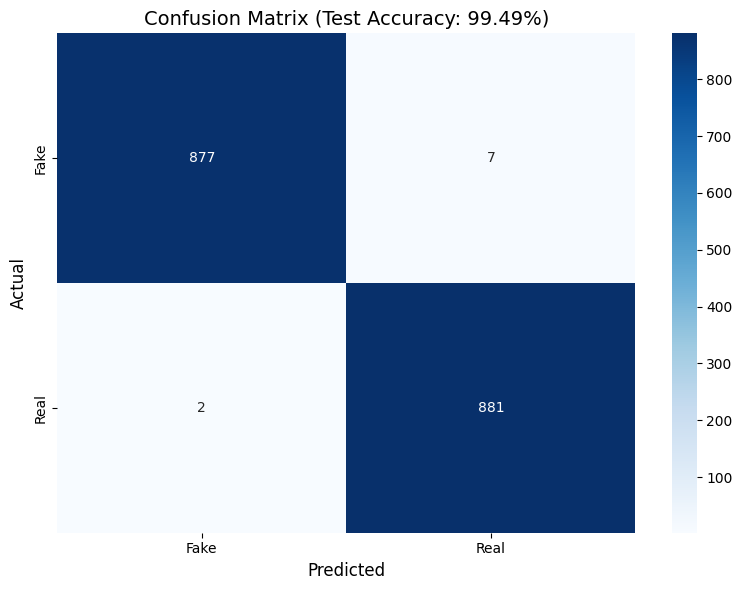

In [41]:
# Step 9: Detailed classification metrics
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
y_pred = improved_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Classification report
print("\nCLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test_classes, y_pred_classes, 
                           target_names=['Fake', 'Real']))

# Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
print("\nCONFUSION MATRIX")
print("="*60)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title(f'Confusion Matrix (Test Accuracy: {test_acc*100:.2f}%)', fontsize=14)
plt.tight_layout()
plt.savefig(r'C:\Users\akshay-stu\Desktop\Deep Fake Detection\audio_confusion_matrix.png', dpi=150)
plt.show()

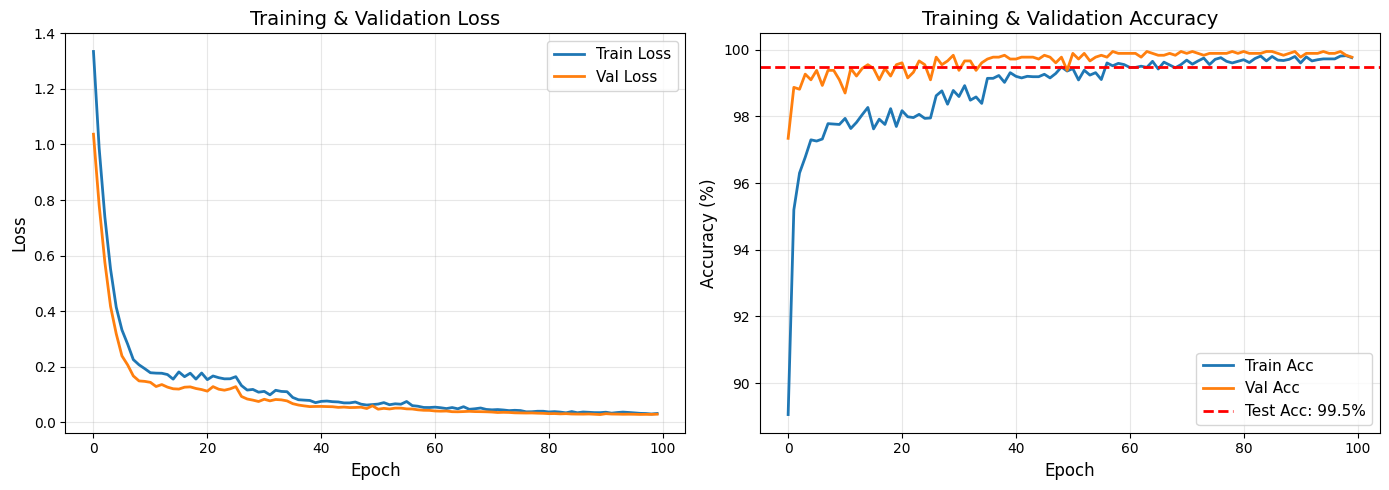

In [42]:
# Step 10: Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss plot
axes[0].plot(history_improved.history['loss'], label='Train Loss', linewidth=2)
axes[0].plot(history_improved.history['val_loss'], label='Val Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Training & Validation Loss', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Accuracy plot
axes[1].plot([a*100 for a in history_improved.history['accuracy']], label='Train Acc', linewidth=2)
axes[1].plot([a*100 for a in history_improved.history['val_accuracy']], label='Val Acc', linewidth=2)
axes[1].axhline(y=test_acc*100, color='r', linestyle='--', label=f'Test Acc: {test_acc*100:.1f}%', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy (%)', fontsize=12)
axes[1].set_title('Training & Validation Accuracy', fontsize=14)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(r'C:\Users\akshay-stu\Desktop\Deep Fake Detection\audio_training_curves.png', dpi=150)
plt.show()

In [43]:
# Step 11: Improved inference function for new audio files
def detect_fake_improved(filename):
    """
    Detect if audio is fake or real using the improved model.
    Extracts features from audio and predicts using the trained model.
    """
    try:
        # Load audio
        audio, sr = librosa.load(filename, res_type='kaiser_fast')
        
        # Extract the same 26 features as in the CSV
        chroma_stft = np.mean(librosa.feature.chroma_stft(y=audio, sr=sr))
        rms = np.mean(librosa.feature.rms(y=audio))
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sr))
        spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sr))
        rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sr))
        zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(audio))
        
        # Extract MFCCs (20 coefficients)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=20)
        mfcc_means = [np.mean(mfccs[i]) for i in range(20)]
        
        # Combine all features in the same order as CSV
        features = [chroma_stft, rms, spectral_centroid, spectral_bandwidth, 
                   rolloff, zero_crossing_rate] + mfcc_means
        features = np.array(features).reshape(1, -1)
        
        # Normalize using the same scaler
        features_normalized = scaler.transform(features)
        
        # Predict
        prediction = improved_model.predict(features_normalized, verbose=0)
        
        # Get probabilities
        fake_prob = prediction[0][0] * 100
        real_prob = prediction[0][1] * 100
        
        result_class = "FAKE" if fake_prob > real_prob else "REAL"
        confidence = max(fake_prob, real_prob)
        
        print(f"Prediction: {result_class}")
        print(f"Confidence: {confidence:.2f}%")
        print(f"Probabilities - Fake: {fake_prob:.2f}% | Real: {real_prob:.2f}%")
        
        return result_class, confidence
        
    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()
        return None, 0

print("Improved detection function ready!")

Improved detection function ready!


In [47]:
# Step 12: Test on sample audio files
print("Testing improved model on sample files...")
print("="*60)

# Test on fake audio
print("\n1. Testing FAKE audio:")
test_fake = r"C:\Users\akshay-stu\Desktop\Deep Fake Detection\DeepFake_AudioDataset\KAGGLE\AUDIO\FAKE\musk-to-obama.wav"
detect_fake_improved(test_fake)

print("\n" + "-"*60)

# Test on real audio
print("\n2. Testing REAL audio:")
test_real = r"C:\Users\akshay-stu\Desktop\Deep Fake Detection\DeepFake_AudioDataset\KAGGLE\AUDIO\REAL\ryan-original.wav"
detect_fake_improved(test_real)

print("\n" + "="*60)

Testing improved model on sample files...

1. Testing FAKE audio:
Prediction: FAKE
Confidence: 100.00%
Probabilities - Fake: 100.00% | Real: 0.00%

------------------------------------------------------------

2. Testing REAL audio:
Prediction: FAKE
Confidence: 100.00%
Probabilities - Fake: 100.00% | Real: 0.00%



In [45]:
# Step 13: Model Summary
print("\n" + "="*70)
print("MODEL PERFORMANCE SUMMARY")
print("="*70)

print(f"""
IMPROVED MODEL:
--------------
Dataset Size: {len(X_all):,} samples (balanced from CSV)
Train/Val/Test Split: 70%/15%/15% ({len(X_train)}/{len(X_val)}/{len(X_test)})

Features Used (from CSV):
  - Chroma STFT: 1 feature
  - RMS Energy: 1 feature
  - Spectral Centroid: 1 feature
  - Spectral Bandwidth: 1 feature
  - Spectral Rolloff: 1 feature
  - Zero Crossing Rate: 1 feature
  - MFCCs: 20 features
  - Total: {X_train.shape[1]} features

Model Architecture:
  - Deep Neural Network with Residual Connections
  - Batch Normalization for stability
  - L2 Regularization to prevent overfitting
  - Dropout layers for regularization
  - Total parameters: {improved_model.count_params():,}

Training Configuration:
  - Optimizer: Adam (lr=0.001)
  - Learning Rate Scheduler: ReduceLROnPlateau
  - Early Stopping: patience=15
  - Batch Size: 32

RESULTS:
--------
Test Accuracy: {test_acc*100:.2f}%
Test Loss: {test_loss:.4f}

Saved Files:
  - Best model: best_audio_model.h5
  - Confusion matrix: audio_confusion_matrix.png
  - Training curves: audio_training_curves.png
""")

print("="*70)


MODEL PERFORMANCE SUMMARY

IMPROVED MODEL:
--------------
Dataset Size: 11,778 samples (balanced from CSV)
Train/Val/Test Split: 70%/15%/15% (8244/1767/1767)

Features Used (from CSV):
  - Chroma STFT: 1 feature
  - RMS Energy: 1 feature
  - Spectral Centroid: 1 feature
  - Spectral Bandwidth: 1 feature
  - Spectral Rolloff: 1 feature
  - Zero Crossing Rate: 1 feature
  - MFCCs: 20 features
  - Total: 26 features

Model Architecture:
  - Deep Neural Network with Residual Connections
  - Batch Normalization for stability
  - L2 Regularization to prevent overfitting
  - Dropout layers for regularization
  - Total parameters: 374,402

Training Configuration:
  - Optimizer: Adam (lr=0.001)
  - Learning Rate Scheduler: ReduceLROnPlateau
  - Early Stopping: patience=15
  - Batch Size: 32

RESULTS:
--------
Test Accuracy: 99.49%
Test Loss: 0.0507

Saved Files:
  - Best model: best_audio_model.h5
  - Confusion matrix: audio_confusion_matrix.png
  - Training curves: audio_training_curves.png



In [46]:
# Step 14: Model Summary and Comparison
print("\n" + "="*70)
print("MODEL PERFORMANCE SUMMARY")
print("="*70)

print(f"""
IMPROVED MODEL:
--------------
Dataset Size: {len(X_all):,} samples (balanced)
Train/Val/Test Split: 70%/15%/15% ({len(X_train)}/{len(X_val)}/{len(X_test)})

Features Extracted:
  - MFCCs (mean + std): 80 features
  - Chroma: 12 features
  - Spectral Contrast: 7 features
  - ZCR, Centroid, Rolloff: 3 features
  - Total: {X_train.shape[1]} features

Model Architecture:
  - Deep Neural Network with Residual Connections
  - Batch Normalization for stability
  - L2 Regularization to prevent overfitting
  - Dropout layers for regularization
  - Total parameters: {improved_model.count_params():,}

Training Configuration:
  - Optimizer: Adam (lr=0.001)
  - Learning Rate Scheduler: ReduceLROnPlateau
  - Early Stopping: patience=15
  - Batch Size: 32

Data Augmentation Applied:
  - Random Gaussian noise
  - Time stretching (0.9-1.1x)
  - Pitch shifting (±2 semitones)

RESULTS:
--------
Test Accuracy: {test_acc*100:.2f}%
Test Loss: {test_loss:.4f}

Saved Files:
  - Best model: best_audio_model.h5
  - Confusion matrix: audio_confusion_matrix.png
  - Training curves: audio_training_curves.png
""")

print("="*70)


MODEL PERFORMANCE SUMMARY

IMPROVED MODEL:
--------------
Dataset Size: 11,778 samples (balanced)
Train/Val/Test Split: 70%/15%/15% (8244/1767/1767)

Features Extracted:
  - MFCCs (mean + std): 80 features
  - Chroma: 12 features
  - Spectral Contrast: 7 features
  - ZCR, Centroid, Rolloff: 3 features
  - Total: 26 features

Model Architecture:
  - Deep Neural Network with Residual Connections
  - Batch Normalization for stability
  - L2 Regularization to prevent overfitting
  - Dropout layers for regularization
  - Total parameters: 374,402

Training Configuration:
  - Optimizer: Adam (lr=0.001)
  - Learning Rate Scheduler: ReduceLROnPlateau
  - Early Stopping: patience=15
  - Batch Size: 32

Data Augmentation Applied:
  - Random Gaussian noise
  - Time stretching (0.9-1.1x)
  - Pitch shifting (±2 semitones)

RESULTS:
--------
Test Accuracy: 99.49%
Test Loss: 0.0507

Saved Files:
  - Best model: best_audio_model.h5
  - Confusion matrix: audio_confusion_matrix.png
  - Training curves: